# Análise de dados Mercado Marassanduba

![Foto do Mercado](Fotos%20Mercado.jpg)

<h1><b><u>Contexto da empresa</u></b></h1>


A empresa atua no segmento de comércio varejista de mercadorias em geral, com ênfase nos setores de **alimentos**, **produtos de limpeza**, e  **higiene pessoal**.


A base de dados utilizada para análise é oriunda de um levantamento real, realizado ao longo de um período de seis meses, contemplando variáveis como data da compra, categorias e quantidades de produtos adquiridos, valor total das transações, bem como indicadores relacionados as vendas.

O objetivo central deste estudo consiste em desenvolver análises que subsidiem a **otimização da gestão de estoques**, o **monitoramento do fluxo de vendas** e a **identificação de padrões comportamentais de consumos**. Tais análises são essenciais para a redução dos custos operacionais, a mitigação de rupturas no abastecimento e, consequentemente, para o aprimoramento da eficiência dos processos logísticos e comerciais da organização, promovendo maior precisão na reposição de produtos e, por consequência, elevando o nível de satisfação dos clientes.



In [107]:
# Importa a biblioteca pandas, que é amplamente utilizada para análise e manipulação de dados em Python.
# Com o pandas, você pode trabalhar com tabelas (DataFrames), ler e escrever arquivos (como Excel, CSV), filtrar dados, agrupar, entre outros.
import pandas as pd 

# Importa a biblioteca matplotlib.pyplot, que é usada para criar gráficos e visualizações simples (como gráficos de barras, linhas, pizza, etc.).
# O alias "plt" é uma abreviação comum para facilitar o uso dos comandos da biblioteca.
import matplotlib.pyplot as plt

# Importa a biblioteca seaborn, que é baseada no matplotlib, mas fornece gráficos com visual mais bonito e opções mais sofisticadas por padrão.
# Muito usada para gráficos estatísticos (como gráficos de dispersão, histogramas, mapas de calor, etc.).
import seaborn as sns

# Importa o módulo locale, que serve para configurar padrões de localidade, como formatação de moeda, datas, separadores decimais etc.
# Isso é útil, por exemplo, para exibir valores no formato brasileiro (R$ 1.000,00) em vez do americano ($1,000.00).
import locale


In [108]:
#Configurações 
locale.setlocale(locale.LC_TIME, 'pt_BR.utf8') #Formatar para o portugues brasileiro
#usado ainda mais em relação as datas da analise sazonal 

'pt_BR.utf8'

In [ ]:
#  Dicionário de Dados

Este dicionário descreve as principais colunas utilizadas na base de dados do projeto de vendas, incluindo tipo de dado e uma breve descrição para cada campo.


| *Nome da Coluna*   | *Tipo*           | *Descrição*                                                                 |
|----------------------|--------------------|-------------------------------------------------------------------------------|
| produto            | Texto (string)     | Nome do produto vendido                                                       |
| categoria_produto  | Texto (string)     | Categoria geral do produto (ex: alimentos, eletrônicos, etc.)                 |
| quantidade         | Inteiro (int)      | Quantidade de unidades vendidas por transação                                |
| preco_unitario     | Decimal (float)    | Preço unitário do produto (em reais)                                          |
| total_venda        | Decimal (float)    | Valor total da venda, calculado como quantidade × preço_unitário           |

---

<h1><b><u>Explorando a Base de Dados</u></b></h1>

In [10]:

# Carregando o arquivo aonde esta nossa base de dados 
df = pd.read_excel(r"C:\Users\andre\OneDrive\Área de Trabalho\ADW\Downloads\Dados_Vendas.xlsx")

# Exibe as primeiras linhas, como padrão as 5 primeiras.
df.head()

,Data,Categorias,Produtos,Quantidades,Preço unitário,Total de vendas
0,2025-04-01,Higiene,Condicionador,4,22.90,91.6
1,2025-04-01,Limpeza,Sabão liquido,4,14.00,56.0
2,2025-04-01,Limpeza,Detergente,8,2.75,22.0
3,2025-04-01,Higiene,Sabonete,1,3.50,3.5
4,2025-04-01,Alimentos,Açúcar,10,8.00,80.0


### Observa-se que a base de dados é composta por seis colunas, a saber:

- **Data:** indica o dia e o mês e o ano em que a compra foi efetuada.
- **Categorias:** indica a classificação do produto adquirido;
- **Quantidade:** refere-se ao número de unidades do produto comprado;
- **Preço Unitário:** corresponde ao valor monetário de cada unidade do produto;
- **Total de Vendas:** corresponde ao montante total obtido na transação, calculado pela multiplicação da quantidade pelo preço unitário;


Essa estruturação dos dados permite uma análise segmentada do comportamento das vendas ao longo do tempo.


#### Resumo Estatístico

Com a base de dados estruturada, é possível aprofundar a análise de cada variável e obter insights mais precisos e fundamentados. O uso do resumo estatístico torna-se essencial nesse processo, pois permite identificar medidas centrais, como a média, além de variabilidade, como o desvio padrão. Esses indicadores oferecem uma visão clara do comportamento dos dados e contribuem para a tomada de decisões mais embasadas.
Então abaixo está o resumo de linhas e colunas totais da base de dados. 

In [11]:
#Analise Descritiva para analisar a integridades dos dados 
#Tamanho da Tabela (Linhas e Colunas)
df.shape

(2929, 6)

- **2929 linhas**: corresponde ao **número total de registros** no seu conjunto de dados.  
- **6 colunas**: corresponde ao **número total de colunas** (atributos) disponíveis para cada registro.


In [12]:
# aponta os Tipos de Dados
df.dtypes 

Data                datetime64[ns]
Categorias                  object
Produtos                    object
Quantidades                  int64
Preço unitário             float64
Total de vendas            float64
dtype: object

**Tipos de Dados no DataFrame**

**1. datetime64[ns]**  
Representa datas e horários. Usado para análises temporais, como tendências e sazonalidades.

**2. object**  
Texto ou rótulos categóricos, como nomes, categorias ou formas de pagamento.

**3. int64**  
Números inteiros, usados para contagens, códigos ou quantidades.

**4. float64**  
Números decimais, geralmente aplicados a valores monetários ou medidas contínuas.


In [13]:
# verifica se tem Campos Nullos ou seja campos vazios 
df.isnull().sum()

Data                0
Categorias          0
Produtos            0
Quantidades         0
Preço unitário      0
Total de vendas     0
dtype: int64

**Ausência de Dados Nulos**

Podemos observar que o DataFrame não contém valores nulos, o que contribui para uma análise mais clara e confiável. A ausência de dados ausentes também reduz a necessidade de etapas complexas de limpeza.


In [ ]:
df.describe(include='number')



| Estatística | O que significa                                                                 | Quantidades | Preço Unitário | Total de Vendas |
|-------------|----------------------------------------------------------------------------------|-------------|----------------|-----------------|
| count       | Total de registros válidos (sem valores nulos)                                  | 2929        | 2929           | 2929            |
| mean        | Média dos valores                                                               | 4.80        | 7.93           | 38.94           |
| std         | Desvio padrão (grau de variação dos valores em torno da média)                 | 2.47        | 4.98           | 33.11           |
| min         | Menor valor registrado                                                          | 1.00        | 2.30           | 2.50            |
| 25%         | Primeiro quartil (25% dos valores estão abaixo desse ponto)                     | 3.00        | 4.90           | 15.00           |
| 50%         | Mediana (valor central dos dados; 50% acima e 50% abaixo)                       | 5.00        | 6.00           | 28.00           |
| 75%         | Terceiro quartil (75% dos valores estão abaixo desse ponto)                     | 6.00        | 10.00          | 52.11           |
| max         | Maior valor registrado                                                          | 22.00       | 26.44          | 239.36          | R$239,36 |


#### Possíveis Considerações

#### 1. Dados completos
- Todas as colunas possuem *2.929 registros válidos*.
- *Não há valores nulos*, o que evita a necessidade de limpeza adicional.
---
#### 2. Distribuição equilibrada
- A média e a mediana estão próximas em todas as colunas, o que indica uma *distribuição relativamente simétrica*.
  - Exemplo: Quantidades → média = 4,80 e mediana = 5,00
---
#### 3. Alta variação
- O *desvio padrão é relativamente alto* em relação à média, especialmente para:
  - *Preço Unitário*: média = 7,93 | desvio = 4,98
  - *Total de Vendas*: média = 38,94 | desvio = 33,11
- Isso sugere que existem *valores muito diferentes entre si*, o que pode indicar:
  - Produtos com preços muito variados
  - Vendas de volumes diferentes (compras pequenas vs grandes)

---



In [ ]:
#Exibe as informações da base 
df.info()


| # | Coluna           | Registros não nulos | Tipo de dado (dtype) | Explicação                                                  |
|---|------------------|---------------------|-----------------------|-------------------------------------------------------------|
| 0 | Data             | 2932                | object                | Representa a data da venda (formato texto) |
| 1 | Categoria        | 2932                | object                | Categoria do produto  (formato texto) |      |
| 2 | Produto          | 2932                | object                | Nome do produto vendido  (formato texto) |                           |
| 3 | Quantidade       | 2932                | int64                 | Quantidade vendida (número inteiro)                         |
| 4 | Preço Unitário   | 2932                | float64               | Valor unitário do produto (com casas decimais)              |
| 5 | Total de vendas  | 2932                | float64               | Valor total da venda (quantidade × preço unitário)          |

---
#### Leitura

- object: tipo genérico para textos (strings ou datas que ainda não foram convertidas)
- int64: números inteiros
- float64: números com ponto flutuante (decimais)
---
#### Uso de memória

- Uso total de memória: *137.6 KB*dências mensais).



<h1><b><u>Estudo Exploratório Inicial </u></b></h1>

Conhecendo a Base de Dados Antes de iniciarmos análises mais aprofundadas, é fundamental entender a base de dados e sua estrutura. Isso garante maior clareza sobre os dados disponíveis e orienta as próximas etapas da exploração.

A seguir, veremos as categorias de produtos disponíveis, o total de vendas e o faturamento por categoria, oferecendo uma visão geral do desempenho de cada segmento.



In [109]:
df.columns = df.columns.str.strip()
print(df.columns.tolist())  # para confirmar os nomes das colunas da base de dados 


# Converte a coluna 'Quantidade' para valores numéricos. 
# Caso tenha valores inválidos (ex: texto), serão convertidos para NaN (ignorado no cálculo).
df['Quantidades'] = pd.to_numeric(df['Quantidades'], errors='coerce')

# Converte a coluna 'Total de vendas' para valores numéricos, ignorando erros da mesma forma.
df['Total de vendas'] = pd.to_numeric(df['Total de vendas'], errors='coerce')

# Calcula a soma total dos valores da coluna 'Quantidade', ignorando valores NaN.
quantidade_total = df['Quantidades'].sum()

# Calcula a soma total dos valores da coluna 'Total de vendas', ignorando valores NaN.
valor_total = df['Total de vendas'].sum()

# Exibe a quantidade total de itens vendidos no console.
print(f"Quantidade total de itens vendidos: {quantidade_total}")

# Exibe o valor total arrecadado em vendas no formato de moeda brasileira (R$), com duas casas decimais e separador de milhares.
print(f"Valor total arrecadado em vendas: R$ {valor_total:,.2f}")



['Data', 'Categorias', 'Produtos', 'Quantidades', 'Preço unitário', 'Total de vendas', 'Mes']
Quantidade total de itens vendidos: 14073
Valor total arrecadado em vendas: R$ 114,052.46


#### A Quantidade totais de itens é 14073
#### O Valor total arrecadado em vendas: R$ 114,052.46

Com base no cálculo do total de vendas, podemos iniciar uma série de análises importantes para entender melhor o desempenho do supermercado e identificar oportunidades de melhoria. 

A partir desse resultado, podemos investigar questões como:

- **O comportamento das vendas ao longo do tempo:**  
  Analisar se o total de vendas está crescendo, estável ou em queda, para avaliar a saúde financeira do negócio e identificar tendências.

- **Variação sazonal das vendas:**  
  Estudar em quais períodos (dias, semanas ou meses) as vendas apresentam aumentos ou quedas, identificando padrões sazonais e períodos críticos.

- **Impacto de datas comemorativas:**  
  Avaliar como eventos especiais como Natal, Páscoa, Black Friday e outras promoções afetam o total de vendas, para potencializar estratégias de marketing e estoque.


- **Produtos que mais contribuem**
  Identificar os principais produtos responsáveis pela maior parte do faturamento, para focar em campanhas, controle de estoque e negociações com fornecedores.

  - **Categorias que mais contribuem**
  Identicar a categoria mais vendida e se ela tem relação com preço ou data.

Essas análises são essenciais para embasar decisões estratégicas, otimizar operações e aumentar a rentabilidade do supermercado.



O gráfico de barras abaixo apresenta o total de vendas por categoria de produto, permitindo identificar quais segmentos tiveram maior volume de comercialização .


C:\Users\andre\AppData\Local\Temp\ipykernel_42448\2665928123.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\andre\AppData\Local\Temp\ipykernel_42448\2665928123.py:54: UserWarning: Glyph 128156 (\N{PURPLE HEART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\andre\AppData\Local\Temp\ipykernel_42448\2665928123.py:54: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\andre\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128156 (\N{PURPLE HEART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\andre\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


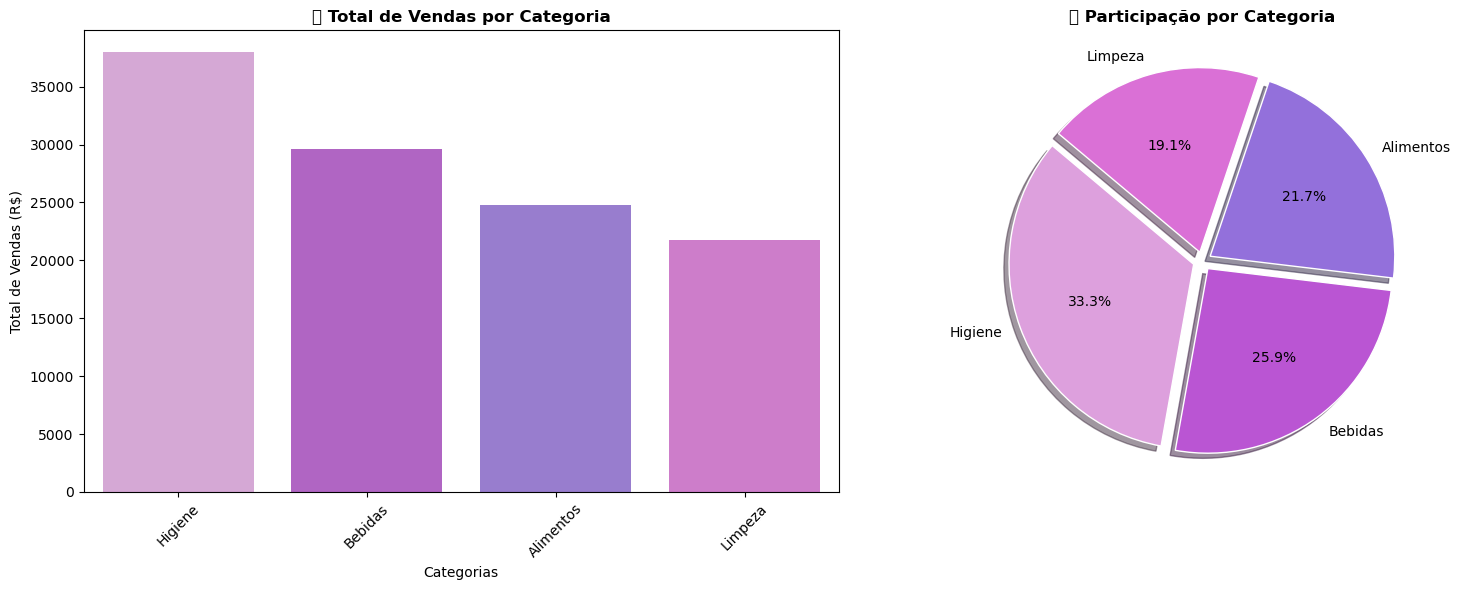

In [111]:

# Padronização e conversões
df.columns = df.columns.str.strip()
df["Categorias"] = df["Categorias"].str.title()
df['Quantidades'] = pd.to_numeric(df['Quantidades'], errors='coerce')
df['Total de vendas'] = pd.to_numeric(df['Total de vendas'], errors='coerce')

# Agrupamento por categoria (total e média)
agrupamento_categoria = df.groupby("Categorias").agg({
    "Quantidades": ["sum", "mean"],
    "Total de vendas": ["sum", "mean"]
}).round(2)
agrupamento_categoria.columns = ['Qtd_Total', 'Qtd_Média', 'Venda_Total', 'Venda_Média']
agrupamento_categoria = agrupamento_categoria.reset_index()
agrupamento_categoria = agrupamento_categoria.sort_values(by='Venda_Total', ascending=False)

# Dados para o gráfico de pizza
vendas_categoria = df.groupby("Categorias")["Total de vendas"].sum().sort_values(ascending=False)

# Paleta personalizada
cores_personalizadas = ["#DDA0DD", "#BA55D3", "#9370DB", "#DA70D6", "#C71585", "#8A2BE2", "#FF69B4"]
while len(cores_personalizadas) < len(vendas_categoria):
    cores_personalizadas += cores_personalizadas
explode = [0.05] * len(vendas_categoria)

# Criar figura com dois subplots lado a lado
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico de barras
sns.barplot(
    data=agrupamento_categoria,
    x='Categorias',
    y='Venda_Total',
    palette=cores_personalizadas[:len(agrupamento_categoria)],
    ax=axes[0]
)
axes[0].set_title("💜 Total de Vendas por Categoria", fontsize=12, weight='bold')
axes[0].set_xlabel("Categorias")
axes[0].set_ylabel("Total de Vendas (R$)")
axes[0].tick_params(axis='x', rotation=45)

# Gráfico de pizza
axes[1].pie(
    vendas_categoria,
    labels=vendas_categoria.index,
    autopct='%1.1f%%',
    startangle=140,
    shadow=True,
    colors=cores_personalizadas[:len(vendas_categoria)],
    explode=explode,
    wedgeprops={'edgecolor': 'white'}
)
axes[1].set_title("📊 Participação por Categoria", fontsize=12, weight='bold')

plt.tight_layout()
plt.show()


### Total de Vendas por Categoria
Aqui apresentamos diferentes tipo e vizualização, em porcentual e de forma quantitativa, para dar fluxo e entendermos de fato qual categoria tem mais impacto no valor total de vendas e o motivo.

#### Visão Geral
O gráfico apresenta a soma do *total de vendas (em reais)* por categoria de produto. O eixo Y representa o valor arrecadado, e o eixo X representa as categorias.

---
#### Categorias analisadas:
- Higiene
- Bebidas
- Alimentos
- Limpeza
---
### Principais Observações:

1. *Categoria com maior faturamento:*
   - *Higiene* é a líder de vendas, ultrapassando os R$ 35.000.
   - Isso indica forte demanda ou maior valor unitário médio por produto.

2. *Outras categorias:*
   - *Bebidas* ocupa a segunda posição, com valor próximo a R$ 28.000.
   - *Alimentos* aparece em terceiro, com vendas ao redor de R$ 22.000.
   - *Limpeza* é a categoria com menor total de vendas (próxima de R$ 20.000).

3. *Diferença entre categorias:*
   - A diferença entre *Higiene* e *Limpeza* é significativa (~R$ 15.000), o que pode indicar:
     - Estratégias promocionais distintas
     - Frequência ou volume de compras diferentes
     - Produtos de maior ticket médio em Higiene



##### Para aprofundar a compreensão sobre o desempenho comercial, foi realizada uma análise dos 10 produtos com maior volume de vendas. O objetivo é identificar quais itens tiveram maior impacto financeiro, destacando aqueles com maior aceitação pelo público.


C:\Users\andre\AppData\Local\Temp\ipykernel_42448\1713243084.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_valor, x="Total de vendas", y="Produtos", palette=cores_lilas_rosa)


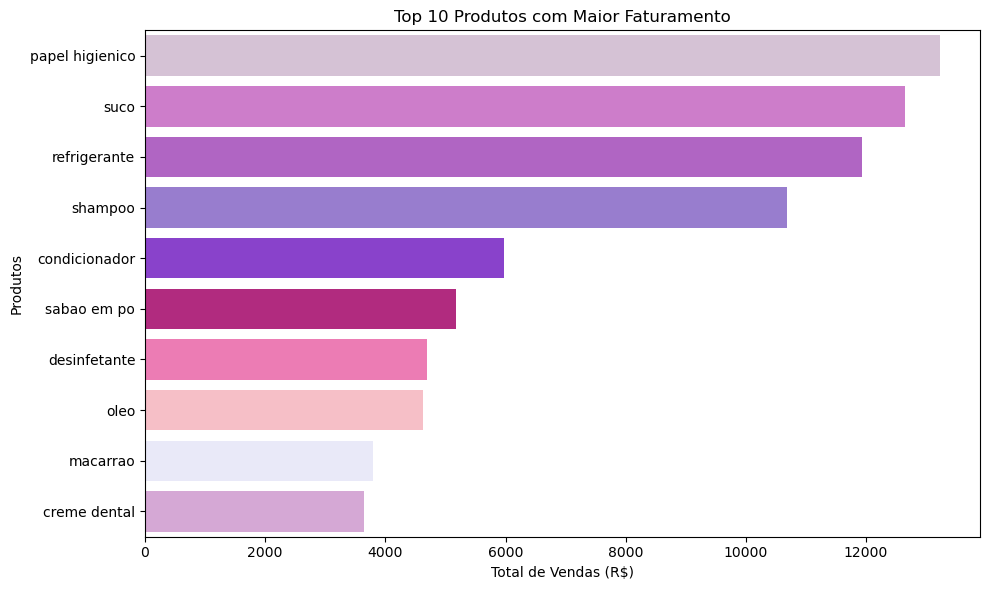

In [36]:
# Agrupa os dados por produto e soma o total de vendas, ordenando do maior para o menor e selecionando os 10 melhores
top_valor = df.groupby("Produtos")["Total de vendas"].sum().sort_values(ascending=False).head(10).reset_index()

# Define uma paleta personalizada em tons de lilás e rosa para o gráfico
cores_lilas_rosa = ["#D8BFD8", "#DA70D6", "#BA55D3", "#9370DB", "#8A2BE2", "#C71585", "#FF69B4", "#FFB6C1", "#E6E6FA", "#DDA0DD"]

# Configura o tamanho da figura do gráfico
plt.figure(figsize=(10, 6))

# Cria um gráfico de barras horizontal usando a paleta lilás e rosa definida
sns.barplot(data=top_valor, x="Total de vendas", y="Produtos", palette=cores_lilas_rosa)

# Define o título do gráfico
plt.title("Top 10 Produtos com Maior Faturamento")

# Define o rótulo do eixo X
plt.xlabel("Total de Vendas (R$)")

# Define o rótulo do eixo Y
plt.ylabel("Produtos")

# Ajusta o layout para evitar sobreposição ou corte dos elementos
plt.tight_layout()

# Exibe o gráfico
plt.show()


### Top 10 Produtos com Maior Faturamento melhor vizualização para leitura 

|  Posição | Produto         | Total de Vendas (R$) | Análise Rápida                                   |
|-----------|------------------|-----------------------|--------------------------------------------------|
| 1º        | Papel higiênico   | ~13.000               | Produto essencial e com alta frequência de compra |
| 2º        | Suco              | ~12.000               | Provavelmente vendido em grande volume           |
| 3º        | Refrigerante      | ~11.000               | Alta demanda e margem atrativa                   |
| 4º        | Shampoo           | ~9.500                | Produto de higiene pessoal com boa rotatividade  |
| 5º        | Condicionador     | ~8.000                | Costuma ser comprado junto com shampoo           |
| 6º        | Sabão em pó       | ~7.000                | Produto de limpeza recorrente                    |
| 7º        | Desinfetante      | ~6.000                | Essencial para higiene, principalmente no pós-pandemia |
| 8º        | Óleo              | ~5.000                | Produto de cozinha básico, vendido em volume     |
| 9º        | Macarrão          | ~4.500                | Alta rotatividade e consumo frequente            |
| 10º       | Creme dental      | ~4.000                | Baixo valor unitário, mas essencial              |

---

#### Análise das 10 Principais Categorias mais vendidas 

O gráfico  apresenta as 10 categorias com maior volume ou valor de vendas, permitindo uma visão detalhada do desempenho de cada segmento. A análise destaca as categorias que mais contribuem para o faturamento total, identifica possíveis oportunidades de crescimento e aponta variações significativas entre os grupos.
Esse levantamento por categoria ajuda a compreender quais setores são mais estratégicos para o negócio, auxiliando na tomada de decisões relacionadas a estoque, marketing e políticas comerciais.



#### Visão Geral

O gráfico apresentado demonstra os dez produtos com maior faturamento. O eixo vertical (eixo Y) representa os produtos, enquanto o eixo horizontal (eixo X) indica o total de vendas em reais (R$).

*Observação:* A imagem analisada não apresenta o item "esponja" como mencionado anteriormente, e sim os produtos "macarrão" e "creme dental" como os últimos da lista em faturamento.

#### Discussão dos Resultados mais afundo 

O produto com maior arrecadação no período é o *papel higiênico*. Esse resultado pode ser justificado por se tratar de um item essencial, de uso diário, com reposição frequente por parte dos consumidores.
Produtos como shampoo, condicionador,   sabão em pó, desinfetante e creme dental aparecem com destaque, evidenciando a importância de itens relacionados à higiene pessoal e doméstica nas decisões de compra.

####  Consumo de bebidas

*Suco* e *refrigerante* ocupam, respectivamente, o segundo e o terceiro lugar em faturamento. Esse dado pode refletir aspectos como o clima local, a cultura alimentar da região e a preferência por bebidas prontas para consumo.

#### Alimentos básicos

Produtos como *óleo* e *macarrão* também se destacam, demonstrando a presença significativa de alimentos de preparo rápido e cotidiano na cesta de compras do consumidor.

#### Considerações Finais

A análise evidencia que os consumidores priorizam a aquisição de *produtos essenciais, especialmente aqueles ligados à **higiene pessoal, **limpeza doméstica, **bebidas* e *alimentação básica*.

Os dados obtidos podem auxiliar em decisões estratégicas de:
- Reposição de estoque;
- Planejamento de promoções;
- Organização do layout dos produtos no ponto de venda.

Essas ações visam otimizar as vendas com base nos hábitos e nas necessidades recorrentes dos consumidores.


#### Após analisar os 10 produtos com maior volume de vendas, direcionamos a atenção aos 10 produtos com menor desempenho, buscando entender seu impacto no faturamento e identificar oportunidades para otimizar estoque, marketing e mix de produtos.


Duplicados no agrupamento: 0


C:\Users\andre\AppData\Local\Temp\ipykernel_42448\7213802.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_menos, x="Total de vendas", y="Produtos", palette=cores_lilas_rosa)


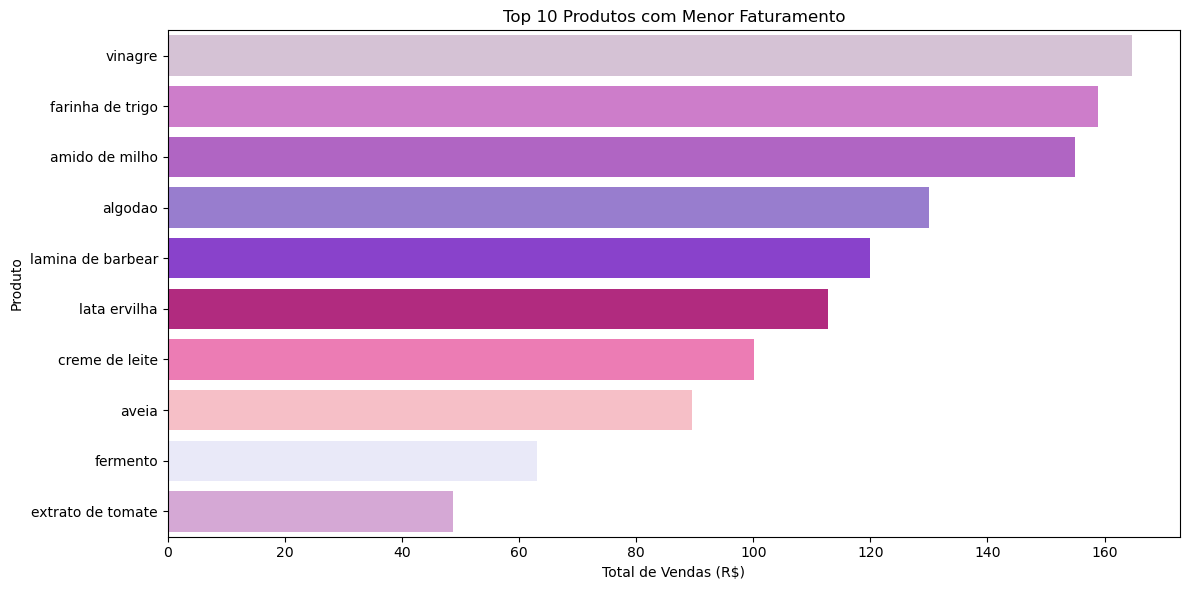

In [112]:

# Função para limpar e normalizar nomes de produtos
def normalize_text(text):
    text = text.strip().lower()  # Remove espaços e converte para minúsculas
    # Remove acentuação e caracteres especiais, mantendo só ASCII
    text = unicodedata.normalize('NFKD', text).encode('ASCII', 'ignore').decode('utf-8')
    text = text.replace('.', '').replace(',', '')  # Remove pontos e vírgulas
    return text

# Aplica a normalização na coluna "Produtos" do DataFrame
df["Produtos"] = df["Produtos"].apply(normalize_text)

# Agrupa os dados por produto e soma o total de vendas para cada um, ordenando do maior para o menor valor
top_valores = df.groupby("Produtos")["Total de vendas"].sum().sort_values(ascending=False).reset_index()

# Verifica se há nomes duplicados no agrupamento (deve ser zero após normalização)
print("Duplicados no agrupamento:", top_valores["Produtos"].duplicated().sum())

# Seleciona os 10 produtos com menor faturamento (últimos da lista ordenada)
top_menos = top_valores.tail(10)

# Paleta personalizada em tons de lilás e rosa
cores_lilas_rosa = ["#D8BFD8", "#DA70D6", "#BA55D3", "#9370DB", "#8A2BE2", "#C71585", "#FF69B4", "#FFB6C1", "#E6E6FA", "#DDA0DD"]

# Configura o tamanho da figura para o gráfico
plt.figure(figsize=(12, 6))

# Cria o gráfico de barras horizontais para os 10 produtos menos lucrativos usando a paleta lilás e rosa
sns.barplot(data=top_menos, x="Total de vendas", y="Produtos", palette=cores_lilas_rosa)

# Define o título do gráfico
plt.title("Top 10 Produtos com Menor Faturamento")

# Define o rótulo do eixo X
plt.xlabel("Total de Vendas (R$)")

# Define o rótulo do eixo Y
plt.ylabel("Produto")

# Ajusta o layout para evitar cortes nos elementos do gráfico
plt.tight_layout()

# Exibe o gráfico
plt.show()


### Top 10 Produtos com Maior Faturamento melhor vizualização para leitura 
|  Posição | Produto           | Total de Vendas (R\$) |  Análise Rápida                                        |
| ---------: | ----------------- | --------------------: | -------------------------------------------------------- |
|         1º | Extrato de tomate |                  \~40 | Produto com menor saída; possível excesso de estoque.    |
|         2º | Fermento          |                  \~70 | Baixa demanda; pode ser sazonal ou mal posicionado.      |
|         3º | Aveia             |                  \~85 | Nichado; público restrito ou pouca visibilidade.         |
|         4º | Creme de leite    |                  \~95 | Potencial subutilizado em campanhas promocionais.        |
|         5º | Lata ervilha      |                 \~110 | Pouco atrativo; considerar embalagem ou oferta.          |
|         6º | Lâmina de barbear |                 \~120 | Categoria de higiene com baixa rotatividade.             |
|         7º | Algodão           |                 \~130 | Provavelmente compra esporádica, giro lento.             |
|         8º | Amido de milho    |                 \~145 | Essencial, mas com pouca procura; falta de promoção?     |
|         9º | Farinha de trigo  |                 \~155 | Produto básico, mas concorrência pode afetar.            |
|        10º | Vinagre           |                 \~165 | Entre os menores, mas ainda com bom desempenho relativo. |


#### Análise das 10 Principais Categorias menos vendidas 

O gráfico a seguir mostra os *10 produtos com os menores valores totais de vendas (em R\$)*. A análise considera a soma total das vendas por produto, do menor para o maior entre os menos vendidos.

#### Visão Geral

Estes produtos apresentam os menores desempenhos em vendas no período analisado, o que pode indicar baixa demanda, estoque excessivo ou necessidade de ações promocionais específicas.


#### Discussão dos Resultados mais afundo 

* *Extrato de tomate* tem o menor faturamento (\~R\$ 40), sendo um alerta para revisar sua estratégia de precificação, visibilidade ou necessidade real de estoque.
* *Produtos de higiene pessoal* como lâmina de barbear e algodão também aparecem entre os 10 menores, o que pode indicar sazonalidade ou baixo giro.
* *Produtos alimentícios básicos* como farinha de trigo e amido de milho estão próximos ao topo da lista (ou seja, com faturamento mais alto entre os menos vendidos), mostrando que ainda têm algum apelo, embora abaixo do esperado.

---

##### Considerações Finais

Esses produtos podem ser alvos de:

* *Promoções* para aumentar a saída de estoque.
* *Reposicionamento* nas prateleiras .
* *Revisão de mix de produtos* se a baixa venda for consistente.

---

#### Com as categorias já analisadas anteriormente, agora podemos aprofundar a avaliação, identificando como preço, quantidade vendida e total de vendas se relacionam dentro dessas categorias, para entender melhor os fatores que influenciam seu impacto no faturamento do mercado.

  

C:\Users\andre\AppData\Local\Temp\ipykernel_42448\335347197.py:11: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\andre\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


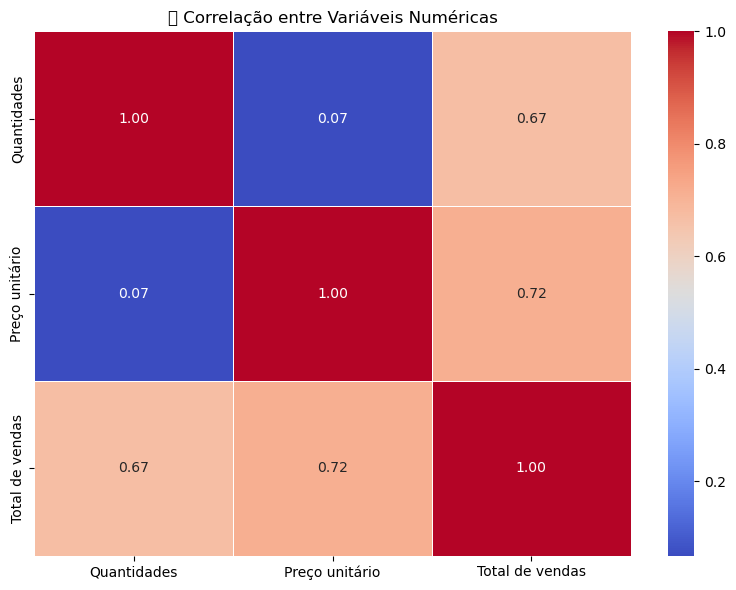

In [127]:
# Selecionar apenas colunas numéricas para correlação
dados_numericos = df[["Quantidades", "Preço unitário", "Total de vendas"]]

# Calcular matriz de correlação
correlacao = dados_numericos.corr()

# Exibir heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlacao, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("🔍 Correlação entre Variáveis Numéricas")
plt.tight_layout()
plt.show()

### Análise de Correlação entre Preço Unitário,  Quantidade vendida, e Total de Vendas

A matriz de correlação é uma ferramenta estatística utilizada para avaliar a força e a direção da relação linear entre variáveis numéricas. Os coeficientes de correlação variam de -1 a 1:

- *+1*: Correlação positiva perfeita — ambas as variáveis aumentam juntas.
- *0*: Ausência de correlação linear.
- *-1*: Correlação negativa perfeita — uma variável aumenta enquanto a outra diminui.

#### Tabela de Coeficientes de Correlação

| Variáveis Comparadas                  | Coeficiente de Correlação | Interpretação                                                  |
|--------------------------------------|----------------------------|----------------------------------------------------------------|
| Quantidade × Quantidade              | 1,00                       | Correlação perfeita (autocorrelação)                           |
| Quantidade × Preço Unitário          | 0,07                       | Correlação muito fraca ou estatisticamente irrelevante         |
| Quantidade × Total de Vendas         | 0,67                       | Correlação moderada a forte, indicando associação positiva     |

#### Interpretação dos Resultados

- A correlação entre *quantidade vendida* e *total de vendas* é de 0,67, indicando uma relação positiva moderada a forte. Isso sugere que, à medida que se vende uma maior quantidade de produtos, o valor total arrecadado tende a aumentar proporcionalmente.
  
- Já a correlação entre *quantidade vendida* e *preço unitário* é de apenas 0,07, o que indica ausência de associação linear relevante entre essas variáveis. Em outras palavras, a quantidade vendida não está diretamente relacionada ao preço unitário dos produtos.

- A autocorrelação, como esperado, é igual a 1,00, pois representa a correlação de uma variável consigo mesma.

#### Considerações Finais

A análise de correlação revela que o *volume de vendas* (quantidade) exerce influência significativa sobre o faturamento total, mas **não apresenta relação linear relevante com o preço unitário**. Isso pode indicar que, nesta base de dados, o desempenho em vendas está mais associado à demanda do produto do que à sua precificação.

##### Dando continuidade à análise geral de correlação entre preço unitário, quantidade vendida e total de vendas, focamos agora especificamente na relação entre quantidade vendida e preço unitário. Entender esse vínculo é essencial para avaliar a sensibilidade do consumidor ao preço dos produtos e identificar padrões de demanda.
##### Essa análise permite verificar se variações no preço influenciam diretamente o volume de vendas, o que é fundamental para definir estratégias de precificação, promoções e otimização de estoque, alinhando as ações comerciais com o comportamento do mercado.


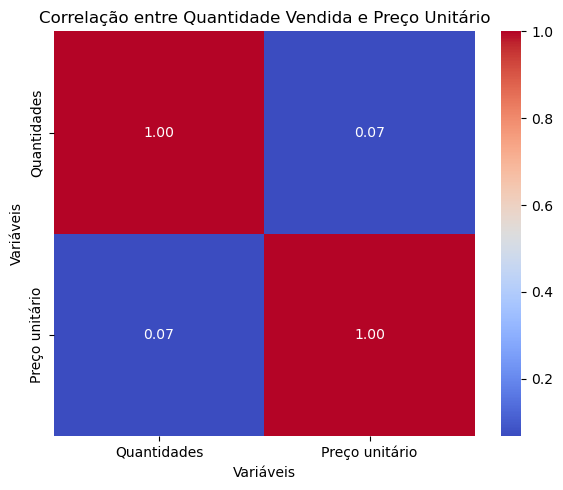

In [54]:

# === 1. CARREGAR OS DADOS ===
df = pd.read_excel(r"C:\Users\andre\OneDrive\Área de Trabalho\ADW\Downloads\Dados_Vendas.xlsx")
df.columns = df.columns.str.strip()  # Limpar nomes das colunas

# === 2. SELECIONAR VARIÁVEIS PARA CORRELAÇÃO ===
dados_correlacao = df[["Quantidades", "Preço unitário"]]

# === 3. CALCULAR MATRIZ DE CORRELAÇÃO ===
matriz_corr = dados_correlacao.corr()

# === 4. PLOTAR HEATMAP COM EIXOS E VALORES ===
plt.figure(figsize=(6, 5))
sns.heatmap(
    matriz_corr,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    xticklabels=["Quantidades", "Preço unitário"],
    yticklabels=["Quantidades", "Preço unitário"]
)
plt.title("Correlação entre Quantidade Vendida e Preço Unitário")
plt.xlabel("Variáveis")
plt.ylabel("Variáveis")
plt.tight_layout()
plt.show()

# === 5. INTERPRETAÇÃO DA CORRELAÇÃO ===
correlacao = matriz_corr.loc["Quantidades", "Preço unitário"]

### Análise da Relação entre Quantidade Vendida e Preço Unitário

A partir dos resultados obtidos sobre o total de vendas por categoria, podemos aprofundar nossa análise avaliando se existe uma relação entre o **preço unitário dos produtos** e a **quantidade vendida**.

A ideia central é responder à seguinte pergunta:

> **"Produtos com preço mais alto tendem a vender em menor quantidade?"**

#### Hipótese
Produtos com valor unitário mais elevado podem ter menor saída, indicando uma **possível relação inversa** entre preço e quantidade comprada pelos clientes.


## Correlação entre Quantidade Vendida e Preço Unitário

A seguir, apresenta-se a análise da correlação entre duas variáveis numéricas da base de dados: *quantidade de itens vendidos* e *preço unitário*. A visualização foi realizada por meio de um heatmap de correlação.

### Tabela de Valores de Correlação

| Variáveis Comparadas                | Coeficiente de Correlação | Interpretação                                                  |
|------------------------------------|----------------------------|----------------------------------------------------------------|
| Quantidade × Quantidade            | 1,00                       | Correlação perfeita (autocorrelação)                           |
| Quantidade × Preço Unitário        | 0,07                       | Correlação muito fraca ou inexistente                          |
| Preço Unitário × Preço Unitário    | 1,00                       | Correlação perfeita (autocorrelação)                           |

### Análise das Cores no Heatmap

- Tons mais escuros de vermelho indicam forte correlação positiva (próxima de 1,00), como ocorre nas autocorrelações.
- Tons mais claros ou azulados indicam fraca correlação, como no caso entre quantidade e preço unitário.

### Considerações Analíticas

- Observa-se que não há correlação significativa entre o preço unitário e a quantidade vendida.
- O coeficiente de 0,07 sugere que as variações de preço não estão diretamente associadas ao volume de vendas.
- Essa ausência de relação linear pode indicar que outros fatores, além do preço, influenciam o comportamento de compra observado na base de dados.
- Como esperado, a autocorrelação (comparação da variável com ela mesma) apresenta valor igual a 1,00.

Esta análise é relevante para avaliar se estratégias de precificação impactam diretamente o volume de vendas. No caso desta base, os dados sugerem que **não há uma relação estatisticamente relevante entre essas duas variáveis.**

- - -



In [128]:
# Remove espaços nos nomes das colunas, se ainda não fez
df.columns = df.columns.str.strip()

# Converte as colunas para numérico, se necessário
df['Preço unitário'] = pd.to_numeric(df['Preço unitário'], errors='coerce')
df['Quantidades'] = pd.to_numeric(df['Quantidades'], errors='coerce')

# Calcula o coeficiente de correlação de Pearson
correlacao = df['Preço unitário'].corr(df['Quantidades'])

# Exibe o resultado
print(f"Coeficiente de correlação: {correlacao:.2f}")


Coeficiente de correlação: 0.07



Para quantificar a relação entre o preço unitário e a quantidade vendida, calculamos o coeficiente de correlação de Pearson. Esse coeficiente mede a força e a direção da associação linear entre as duas variáveis, variando entre -1 e 1. Valores próximos de 1 indicam correlação positiva forte, próximos de -1 indicam correlação negativa forte, e valores próximos de 0 indicam pouca ou nenhuma correlação.


<h1><b><u>Análises Sazonais</u></b></h1>

#### Com base nas análises de correlação entre produtos mais e menos vendidos, total de vendas e categorias, avançamos agora para uma investigação sazonal, a fim de avaliar se as datas exercem influência direta sobre o volume de vendas.

Compreender as variações ao longo do tempo é essencial para identificar padrões de comportamento do consumidor, efeitos sazonais e oportunidades ligadas a períodos específicos, como feriados, finais de semana ou mudanças de estação. Essa análise permite antecipar demandas e orientar estratégias de estoque, promoções e planejamento de vendas de forma mais eficiente.


Meses encontrados: <PeriodArray>
['2025-04', '2024-12', '2025-02', '2025-01', '2025-03', '2024-11']
Length: 6, dtype: period[M]


C:\Users\andre\AppData\Local\Temp\ipykernel_42448\2782798616.py:39: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\andre\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


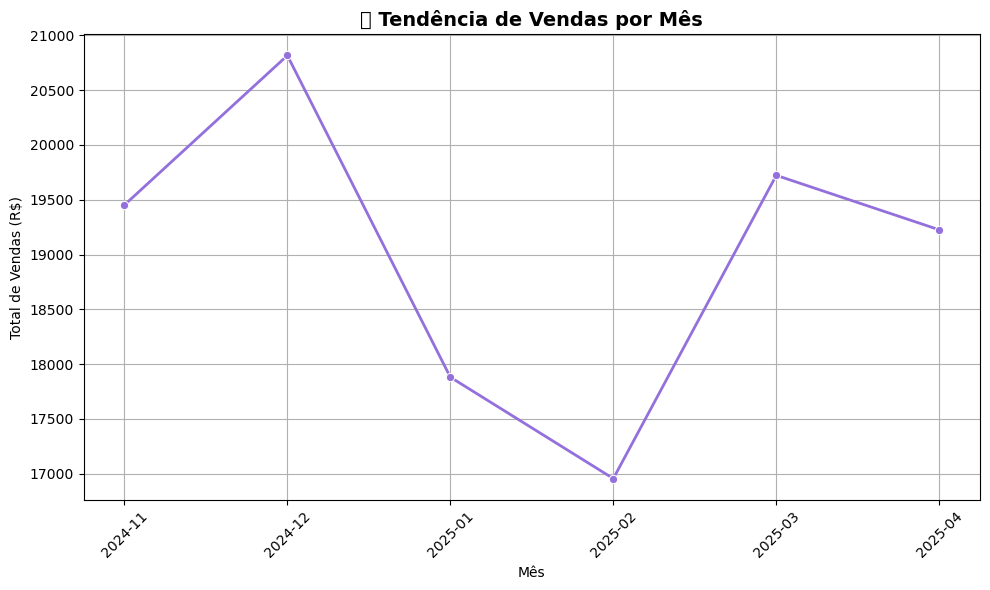

In [60]:

# Limpeza da coluna "Total de vendas"
df["Total de vendas"] = df["Total de vendas"].astype(str)
df["Total de vendas"] = df["Total de vendas"].replace(r"R\$", "", regex=True)
df["Total de vendas"] = df["Total de vendas"].str.replace(",", ".")
df["Total de vendas"] = pd.to_numeric(df["Total de vendas"], errors="coerce")

# Conversão da coluna "Data"
df["Data"] = pd.to_datetime(df["Data"], dayfirst=True, errors="coerce")

# Remover linhas com valores ausentes em "Data" ou "Total de vendas"
df = df.dropna(subset=["Data", "Total de vendas"])

# Verifique os meses únicos presentes (para debug)
print("Meses encontrados:", df["Data"].dt.to_period("M").unique())

# Criar coluna "Mes"
df["Mes"] = df["Data"].dt.to_period("M").astype(str)

# Agrupar e calcular variação percentual
vendas_por_mes = df.groupby("Mes")["Total de vendas"].sum().reset_index()
vendas_por_mes["Variação %"] = vendas_por_mes["Total de vendas"].pct_change().fillna(0) * 100

# Gráfico
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=vendas_por_mes,
    x="Mes",
    y="Total de vendas",
    marker="o",
    color="#9370DB",
    linewidth=2
)

plt.title("📈 Tendência de Vendas por Mês", fontsize=14, weight='bold')
plt.xlabel("Mês")
plt.ylabel("Total de Vendas (R$)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()



| Mês         |  Vendas (estimadas) |Hipótese para o comportamento |
|----------------|------------------------|----------------------------------|
| *2024-11*    | ~19.500                | Início de preparação para festas, aumento moderado nas compras. |
| *2024-12*    | ~21.000                | *Alta significativa* por conta das festas de fim de ano (Natal e Ano Novo). Aumento no consumo de alimentos, bebidas e higiene. |
| *2025-01*    | ~18.500                | *Queda pós-festas*: consumidores seguram os gastos após o pico de dezembro. |
| *2025-02*    | ~17.000                | *Ponto mais baixo*: despesas com impostos (IPVA, IPTU), material escolar e impacto do Carnaval. |
| *2025-03*    | ~20.000                | *Recuperação nas vendas*: volta às aulas, promoções e normalização da rotina. |
| *2025-04*    | ~19.000                | Leve queda após o pico de março, indicando tendência de estabilização. |

---


### Análise da Tendência de Vendas por Mês

O gráfico acima apresenta a **evolução do total de vendas mensais (em R$)** no período de **novembro de 2024 a abril de 2025**. Abaixo, destacamos os principais pontos observados:

- **Novembro/2024**: O total de vendas inicia em aproximadamente **R$ 19.500**, servindo como uma base estável para o período analisado.

- **Dezembro/2024**: Ocorre um **aumento expressivo** nas vendas, atingindo o pico do período com um valor próximo de **R$ 21.000**. Esse crescimento pode estar relacionado ao movimento sazonal de fim de ano, típico do comércio varejista.

- **Janeiro/2025**: As vendas caem drasticamente para cerca de **R$ 17.800**, indicando uma possível "ressaca" pós-festas ou redução natural no consumo no início do ano.

- **Fevereiro/2025**: Registra-se o menor valor do período, em torno de **R$ 17.000**, mantendo a tendência de baixa observada no mês anterior.

- **Março/2025**: As vendas se recuperam significativamente, alcançando cerca de **R$ 19.300**, quase retornando ao patamar de novembro.

- **Abril/2025**: Observa-se uma leve queda, com o total de vendas fechando o mês em aproximadamente **R$ #18.900**.

### Resumo da Variação

- Há uma alta sazonal clara em **dezembro**.
- Os meses de **janeiro e fevereiro** apresentam queda significativa nas vendas.
- Em **março e abril**, nota-se uma recuperação parcial do volume de vendas.

Essa análise revela um comportamento típico de segmentos comerciais influenciados pela sazonalidade: forte alta em dezembro seguida de retração no início do ano. A recuperação nos meses seguintes pode refletir retomada gradual do consumo ou ações aplicadas no período.


#### Dando continuidade às análises sazonais, avançamos agora para uma visualização mais detalhada do comportamento das vendas ao longo do tempo, com foco nos dias do ano.

Através do heatmap a seguir, é possível observar como o volume de vendas varia diariamente em cada ano analisado. Essa abordagem permite identificar padrões de alta e baixa demanda distribuídos no calendário, ajudando a reconhecer sazonalidades específicas, como datas comemorativas, ciclos de consumo e possíveis períodos críticos de vendas.

**Como interpretar o gráfico:**  
- Cada linha representa um ano distinto e cada coluna um dia específico do calendário (no formato dia/mês).  
- As cores indicam o volume de vendas, onde tons mais claros representam maiores vendas e tons mais escuros, menores vendas.  
- Assim, áreas claras mostram picos de vendas em dias específicos, enquanto áreas escuras indicam períodos de menor movimento.


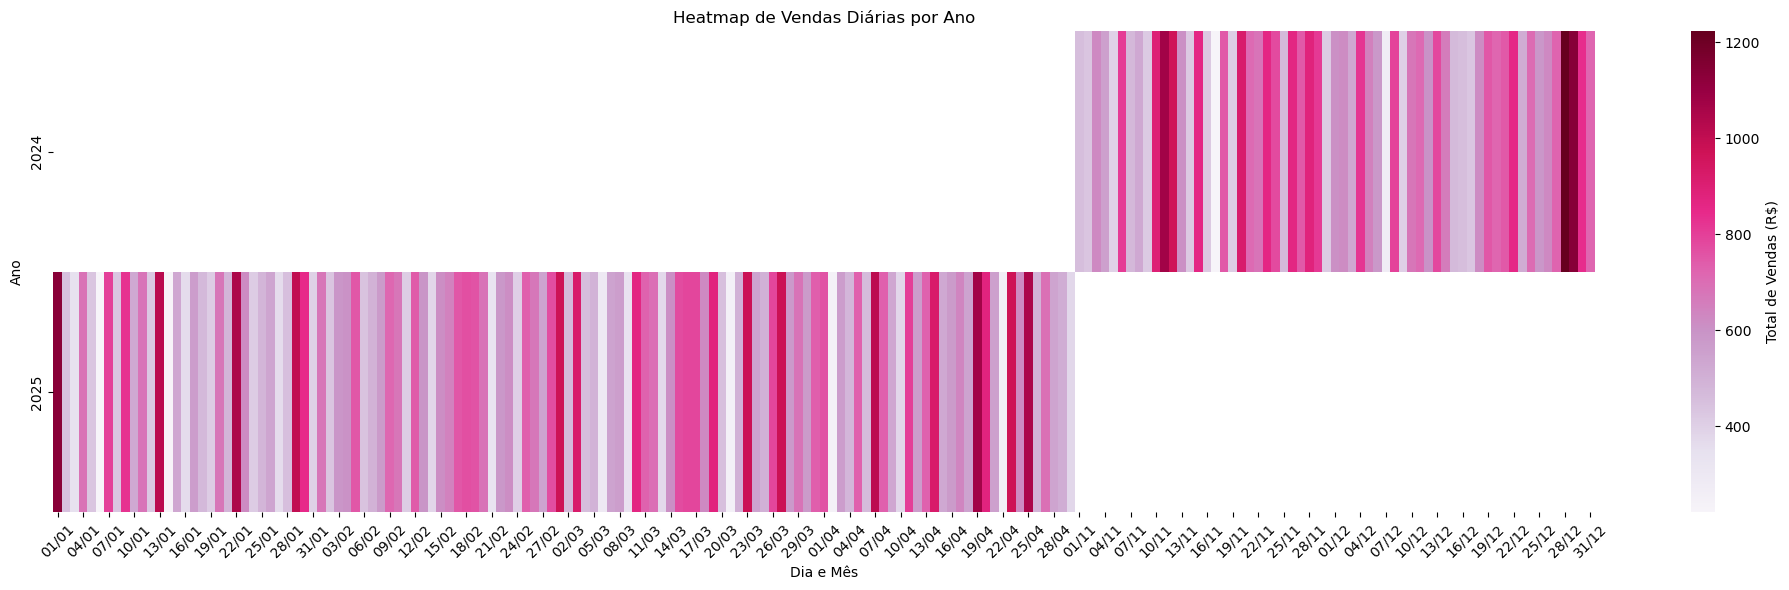

In [114]:
# Converte a coluna 'Data' para o formato datetime, tratando possíveis erros
df['Data'] = pd.to_datetime(df['Data'], errors='coerce')

# Remove linhas onde a data não pôde ser convertida (NaT)
df = df.dropna(subset=['Data'])

# Garante que a coluna 'Total de vendas' está em formato numérico
df['Total de vendas'] = pd.to_numeric(df['Total de vendas'], errors='coerce')

# Agrupa os dados por dia, somando o total de vendas para cada data
vendas_diarias = df.groupby('Data')['Total de vendas'].sum().reset_index()

# Cria colunas auxiliares para análise
vendas_diarias['Ano'] = vendas_diarias['Data'].dt.year                 # Ano da venda
vendas_diarias['Dia_Mes'] = vendas_diarias['Data'].dt.strftime('%d/%m')  # Formata como dia/mês (ex: 25/12)

# Reorganiza os dados para o formato necessário ao heatmap
# Linhas: anos; Colunas: dia/mês; Valores: total de vendas
heatmap_data = vendas_diarias.pivot(index='Ano', columns='Dia_Mes', values='Total de vendas')

# Reordena as colunas (datas) seguindo a ordem do calendário
heatmap_data = heatmap_data.reindex(
    sorted(heatmap_data.columns, key=lambda x: pd.to_datetime(x, format='%d/%m')),
    axis=1
)

# Geração do heatmap com Seaborn
plt.figure(figsize=(20, 6))  # Define o tamanho do gráfico
sns.heatmap(
    heatmap_data,
    cmap="PuRd",  # Paleta de cor em tons de roxo
    cbar_kws={'label': 'Total de Vendas (R$)'}  # Legenda da barra de cores
)
plt.title("Heatmap de Vendas Diárias por Ano")  # Título do gráfico
plt.xlabel("Dia e Mês")  # Rótulo do eixo X
plt.ylabel("Ano")        # Rótulo do eixo Y
plt.xticks(rotation=45)  # Rotaciona os nomes do eixo X para melhor leitura
plt.tight_layout()       # Ajusta o layout para evitar sobreposição
plt.show()               # Exibe o gráfico



### Implicações Estratégicas
A utilização do heatmap nos permitiu não apenas visualizar o volume de vendas diárias, mas também obter uma compreensão mais profunda sobre o comportamento dos consumidores ao longo do tempo.

A análise dos dados entre 2024 e 2025 revelou padrões sazonais consistentes, com picos de vendas ocorrendo em datas específicas. Esses picos parecem estar relacionados a eventos como início de mês, ações promocionais e feriados, sugerindo que o calendário comercial influencia diretamente a movimentação do mercado.

Também foi possível observar que certos períodos do mês apresentam vendas mais intensas de forma recorrente. Isso indica que existe um comportamento de compra concentrado em dias estratégicos, possivelmente associados ao recebimento de salários ou campanhas de vendas regulares.

A comparação entre os dois anos analisados mostrou variações no comportamento dos consumidores. Em alguns meses, os padrões se mantêm semelhantes, mas em outros há mudanças no volume e na distribuição das vendas, o que pode refletir diferentes estratégias comerciais, variações externas (como economia ou clima) ou até a evolução da operação do mercado.

Além disso, dias com volumes muito baixos, identificados pelas áreas mais claras do gráfico, apontam oportunidades de otimização. Esses momentos de baixa movimentação podem ser trabalhados com ações específicas, como promoções direcionadas, ajustes operacionais ou reforço de divulgação para melhorar os resultados.

Essa análise oferece subsídios concretos para decisões estratégicas, tais como:

- *Planejamento de estoque* mais alinhado com os dias de maior demanda.
- *Criação de campanhas promocionais* em períodos de baixo volume para suavizar a curva de vendas.
- *Gestão de equipe e turnos*, otimizando o número de colaboradores em função da previsão de demanda.
- *Acompanhamento de performance de campanhas passadas*, comparando seus efeitos diretos sobre os picos de vendas no gráfico.


- - - 
 <h1><b><u>Análise de Outliers no Total de Vendas</u></b></h1>

Este gráfico apresenta um boxplot do total de vendas, que é uma ferramenta visual eficaz para identificar outliers — valores atípicos que se distanciam significativamente da maior parte dos dados.

Leitura:

A caixa representa o intervalo interquartil (IQR), onde estão concentrados os 50% centrais dos dados.
A linha dentro da caixa indica a mediana das vendas.
Os “bigodes” se estendem até os limites definidos pelo método do IQR (1,5 vezes o intervalo interquartil).
Pontos fora desses limites são considerados outliers, indicando vendas excepcionalmente baixas ou altas, que merecem atenção especial para entender possíveis causas ou erros nos dados.
Essa análise ajuda a identificar se há valores que podem distorcer a compreensão geral das vendas e orientar estratégias de tratamento ou investigação

Limite inferior para outliers: -40.66
Limite superior para outliers: 107.78
Número de outliers encontrados: 142
Outliers:
44      125.40
57      239.36
61      152.32
63      108.80
68      108.80
         ...  
2858    131.90
2859    120.00
2865    108.80
2885    108.08
2914    120.00
Name: Total de vendas, Length: 142, dtype: float64


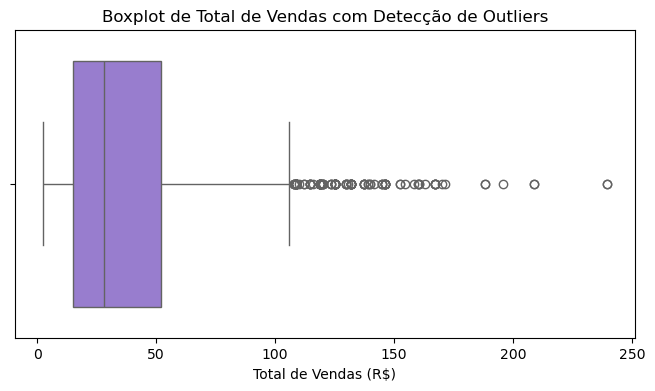

In [117]:

# Garante que a coluna está no formato numérico
df['Total de vendas'] = pd.to_numeric(df['Total de vendas'], errors='coerce')

# Remove valores nulos para análise correta
dados = df['Total de vendas'].dropna()

# Cálculo do IQR para detectar outliers
Q1 = dados.quantile(0.25)
Q3 = dados.quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificação dos outliers
outliers = dados[(dados < limite_inferior) | (dados > limite_superior)]

print(f"Limite inferior para outliers: {limite_inferior:.2f}")
print(f"Limite superior para outliers: {limite_superior:.2f}")
print(f"Número de outliers encontrados: {outliers.count()}")
print("Outliers:")
print(outliers)

# Visualização com boxplot usando paleta personalizada
plt.figure(figsize=(8, 4))
sns.boxplot(x=dados, color="#9370DB")  # tom lilás
plt.title('Boxplot de Total de Vendas com Detecção de Outliers')
plt.xlabel('Total de Vendas (R$)')
plt.show()



### Leitura de Outliers

| Linha                            | Valor / Exemplo         | Explicação                                                                                                   |
| -------------------------------- | ----------------------- | ------------------------------------------------------------------------------------------------------------ |
| Limite inferior para outliers  | -40,66                  | Limite mínimo calculado pelo método IQR. Nenhum valor real é negativo, então *não há outliers inferiores*. |
| Limite superior para outliers  | 107,78                  | Qualquer valor *acima disso é considerado outlier* (acima da média esperada).                              |
| Número de outliers encontrados | 142                     | Total de registros que ultrapassam o limite superior de R\$ 107,78.                                          |
| Outliers: (ex: 44  → 125.40) | Índice 44 = 125,40      | O índice 44 da base de dados contém um valor que é outlier. Isso se repete para todos os demais listados.    |
| 57 → 239.36                    | Valor máximo encontrado | Este é o *maior total de vendas* da base. Muito acima da média, por isso é outlier.                        |
| 61 → 152.32, 63 → 108.80     | Outros exemplos reais   | Valores reais de produtos que venderam bem acima da maioria.                                                 |
| ...                            | (continuação da lista)  | Indica que há muitos outros (até 142), mas só uma parte foi mostrada.                                        |
| Name: total de vendas          | dtype: float64          | O nome da coluna analisada e seu tipo de dado (float64 = número decimal).                                  |



O gráfico mostra como os valores das vendas estão distribuídos por transação. Ele ajuda a entender onde estão a maioria dos dados e quais valores fogem do padrão.

- A maioria das vendas está abaixo de R$ 80,00, o que mostra que esse é o valor mais comum.

- A mediana (linha do meio na caixa) está perto do início do gráfico, indicando que a maior parte das vendas tem valores baixos.

- Há vários outliers acima de R$ 100,00, chegando perto de R$ 240,00. Isso mostra que existem vendas bem acima do valor normal.


### O que esses outliers podem representar?

Esses valores atípicos podem ser explicados por diferentes hipóteses:

1. **Compras de grande volume**: Um cliente pode ter comprado várias unidades de um ou mais produtos em uma única transação.
2. **Produtos com alto ticket médio**: Algumas categorias ou itens específicos podem ter preço elevado, influenciando o valor final da venda.
3. **Promoções ou combos especiais**: Pacotes promocionais com múltiplos produtos podem gerar vendas mais altas em determinados momentos.
4. **Vendas corporativas ou em atacado**: Empresas comprando em maior escala podem gerar essas transações fora do padrão normal de um consumidor comum.


## Interpretação do Gráfico de Boxplot - Quantidade Vendida por Venda

Após identificarmos os outliers no conjunto de dados, seguimos para a análise específica da quantidade vendida em cada transação, focando nos valores atípicos e na dispersão das quantidades.

- A linha central da caixa representa a mediana da quantidade vendida, indicando o valor central da distribuição.  
- A extensão da caixa corresponde ao intervalo interquartil (IQR), que abrange a variação entre o 25º e o 75º percentil.  
- Os “bigodes” mostram a amplitude dos dados dentro de 1,5 vezes o IQR, englobando a maior parte das observações.  
- Pontos fora dessa faixa são considerados outliers, sinalizando vendas incomuns, como pedidos muito grandes ou possíveis erros de registro.

Essa visualização é fundamental para entender a concentração e variabilidade das quantidades vendidas, permitindo identificar padrões atípicos que possam impactar a análise geral e orientar ajustes estratégicos na operação comercial.

C:\Users\andre\AppData\Local\Temp\ipykernel_42448\3888899498.py:12: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\andre\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


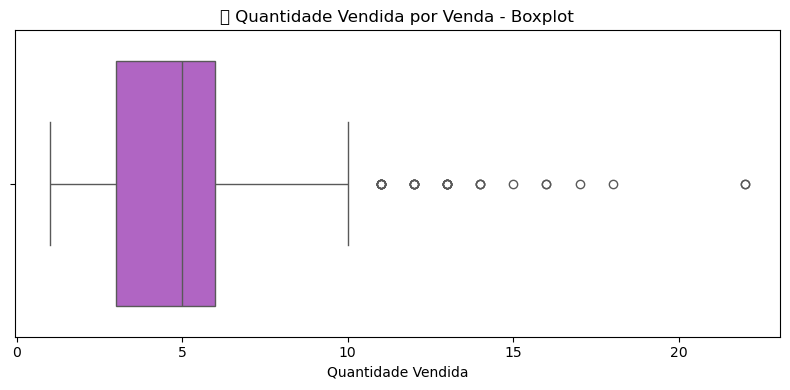

In [119]:

# Garantir que a coluna 'Quantidades' está numérica
df['Quantidades'] = pd.to_numeric(df['Quantidades'], errors='coerce')

# Remover valores nulos para análise correta
dados = df['Quantidades'].dropna()

# Plot do boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(x=dados, color="#BA55D3")  # tom lilás/roxo
plt.title("📊 Quantidade Vendida por Venda - Boxplot")
plt.xlabel("Quantidade Vendida")
plt.tight_layout()
plt.show()



#### Visão Geral

- *Mediana:* Representada pela linha interna da caixa, a mediana se encontra em aproximadamente *5 unidades vendidas por venda*. Isso significa que metade das vendas foi de até 5 unidades.

- *Quartis (Caixa):* A caixa roxa indica o intervalo entre o primeiro quartil (Q1) e o terceiro quartil (Q3), o que representa os *50% centrais dos dados. Nesse caso, a maioria das vendas está concentrada entre **cerca de 2 e 10 unidades*.

- *Bigodes:* As linhas que se estendem a partir da caixa indicam a *variabilidade fora da mediana, abrangendo as vendas ainda consideradas dentro da normalidade. Os bigodes alcançam aproximadamente **0 a 13 unidades vendidas*.

- *Outliers:* Os pontos fora dos bigodes representam *valores atípicos, ou seja, vendas com quantidade significativamente superior à maioria. No gráfico, observa-se a ocorrência de vendas com **mais de 15 unidades, chegando a **valores acima de 20 unidades por venda*.

#### Interpretação Analítica

A análise do gráfico permite inferir que:

- A maior parte das transações corresponde a *pequenas quantidades de produtos, sugerindo que os consumidores realizam **compras de reposição frequente*, com perfil típico de consumo doméstico ou de proximidade.

- As *vendas com grandes quantidades* ocorrem com menor frequência, sendo consideradas exceções. Essas vendas atípicas podem estar associadas a *compras corporativas, **clientes que compram em atacado, **promoções específicas* ou *compras de produtos com alta rotatividade*.

- A distribuição apresenta uma *assimetria à direita, ou seja, há maior ocorrência de valores extremos com **altas quantidades vendidas*, o que reforça a existência de um grupo específico de consumidores que adquirem volumes acima do padrão.

#### Considerações Finais 

O boxplot analisado permite compreender o comportamento típico das vendas por transação no período observado. A mediana e o intervalo interquartil indicam um padrão de vendas com *baixa quantidade por transação*, enquanto os outliers revelam a presença de um grupo de vendas com volumes elevados, que merecem atenção estratégica.

A análise sugere que:

- O *estoque e o abastecimento* devem priorizar produtos de giro rápido e baixo volume por venda;
- Estratégias de marketing podem ser elaboradas para *incentivar o aumento do ticket médio*, especialmente nas faixas de venda mais comuns;
- É possível identificar e atender um *segmento de clientes de alto volume*, por meio de ações específicas e personalizadas.

## Análise dos Preços Unitários dos Produtos

Após explorarmos a base de dados com foco em categorias, outliers e correlações, avançamos agora para uma análise direcionada aos preços unitários dos produtos.

Essa etapa busca compreender quais itens possuem os valores mais elevados por unidade, o que pode indicar produtos de maior valor agregado, estratégias específicas de precificação ou possíveis distorções nos registros.

A seguir, apresentamos uma lista dos produtos com os maiores preços unitários, seguida de um gráfico de dispersão que facilita a visualização dessas variações.

In [121]:

print(df[['Produtos', 'Preço unitário']]
      .sort_values(by='Preço unitário', ascending=False)
      .head(15)
      .to_string(index=False))




      Produtos  Preço unitário
limpa aluminio           26.44
limpa aluminio           26.44
limpa aluminio           26.44
limpa aluminio           26.44
limpa aluminio           26.44
        azeite           23.30
        azeite           23.30
        azeite           23.30
 condicionador           22.90
 condicionador           22.90
 condicionador           22.90
 condicionador           22.90
 condicionador           22.90
 condicionador           22.90
 condicionador           22.90


### Tabela de Preços Unitários por Produto

Esta análise apresenta uma tabela com produtos e seus respectivos preços unitários. A distribuição mostra múltiplas ocorrências dos mesmos produtos, sugerindo que os dados podem ter sido extraídos de pedidos individuais ou movimentações distintas no sistema.

#### Visão Geral
A tabela contém três colunas: um identificador numérico (possivelmente de pedido ou item), o nome do produto e o seu respectivo *preço unitário*. Foram identificados três produtos com diferentes frequências de repetição.



#### Produtos analisados e padrões identificados:

- *Limpa alumínio*
  - Aparece 5 vezes, com preço fixo de R$ 26,44.
  - Consistência de preço pode indicar produto padronizado com pouca variação entre lotes.

- *Azeite*
  - Aparece 3 vezes, com preço unitário constante de R$ 23,30.
  - Menor frequência de ocorrência pode sugerir menor demanda ou estoque mais limitado.

- *Condicionador*
  - Aparece 7 vezes, sempre com o mesmo valor de R$ 22,90.
  - Alta recorrência, apesar de ser o de menor preço do grupo, pode sugerir maior rotatividade ou ampla variedade de marcas sob o mesmo nome comercial.



C:\Users\andre\AppData\Local\Temp\ipykernel_42448\3236928444.py:8: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


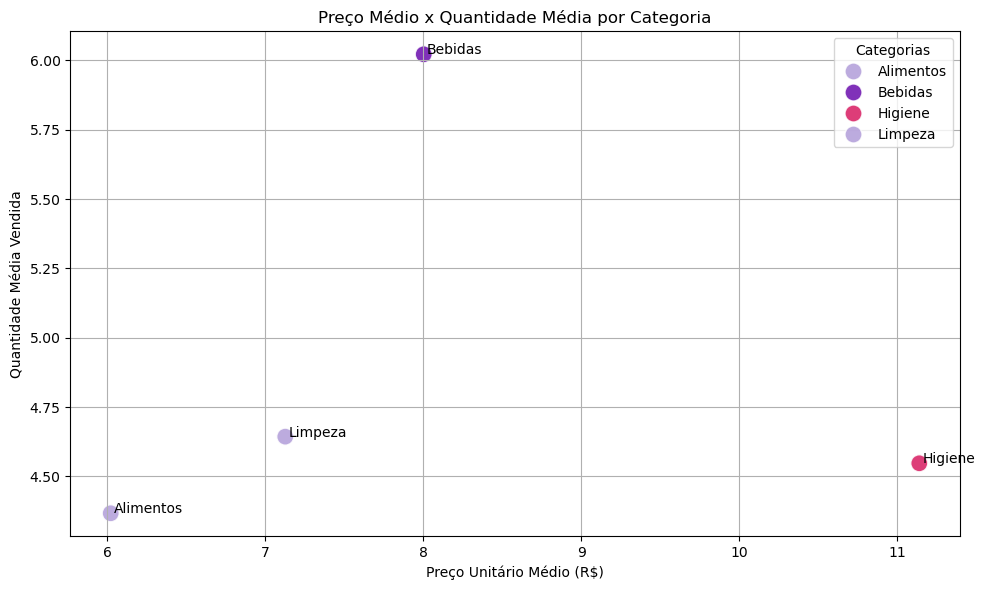

In [125]:

# Paleta lilás, roxo e rosa com maior contraste
paleta_lilas_ajustada = sns.color_palette(["#B19CD9", "#6A0DAD", "#D81B60"])

# Agrupar por categoria e calcular a média de preço e quantidade vendida
agrupado = df.groupby("Categorias")[["Preço unitário", "Quantidades"]].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=agrupado,
    x="Preço unitário",
    y="Quantidades",
    hue="Categorias",
    palette=paleta_lilas_ajustada,
    s=150,
    alpha=0.85
)

# Adicionar os nomes das categorias ao lado dos pontos
for i in range(agrupado.shape[0]):
    plt.text(
        agrupado["Preço unitário"][i] + 0.02,
        agrupado["Quantidades"][i],
        agrupado["Categorias"][i],
        fontsize=10
    )

plt.title("Preço Médio x Quantidade Média por Categoria")
plt.xlabel("Preço Unitário Médio (R$)")
plt.ylabel("Quantidade Média Vendida")
plt.grid(True)
plt.tight_layout()
plt.show()


### Preço Médio vs. Quantidade Média Vendida por Categoria

O gráfico exibe a relação entre o *preço médio unitário (R$)* e a *quantidade média vendida* para quatro categorias de produtos: Alimentos, Bebidas, Higiene e Limpeza. É uma análise de dispersão que permite entender como o comportamento de preço se relaciona com o volume médio de vendas por tipo de produto.

#### Visão Geral

- *Eixo X:* Preço Unitário Médio, variando aproximadamente de R$ 7,00 a R$ 11,00.
- *Eixo Y:* Quantidade Média Vendida, variando de 4,0 a 6,0 unidades.
- Cada ponto representa uma categoria específica, colorida de acordo com a legenda.

### Principais Observações

1. *Bebidas:*
   - Apresenta a *maior quantidade média vendida*, por volta de 6,00 unidades.
   - Possui preço médio intermediário (cerca de R$ 7,50), o que sugere alta rotatividade com preços acessíveis.

2. *Higiene:*
   - Detém o *maior preço médio unitário*, em torno de R$ 10,00.
   - Está associada à menor média de vendas (próxima de 4,00), indicando produtos de maior valor com menor frequência de compra.

3. *Alimentos e Limpeza:*
   - Ambas têm preços médios semelhantes (entre R$ 7,00 e R$ 7,50).
   - Quantidade média vendida varia entre 4,5 e 5,0 unidades, refletindo equilíbrio entre preço e volume.

### Interpretações Possíveis

- *Produtos de maior valor, como os de Higiene*, tendem a ser comprados em menor quantidade, mas podem ter maior impacto no faturamento por unidade.
- *Itens com preços médios menores, como Bebidas*, podem compensar o baixo preço com volume elevado, sendo estratégicos para aumento de receita em escala.
- A análise ajuda a orientar decisões como foco promocional, reposicionamento de preço ou desenvolvimento de categorias com maior potencial de venda por volume ou valor.

## Síntese dos Resultados
Após uma análise detalhada dos dados apresentados, destacamos os principais insights e considerações finais que podem orientar decisões futuras.

Apresentamos visualmente a quantidade de vendas e a receita gerada por produto e categoria. Identificamos possíveis hipóteses sobre os fatores que influenciam as vendas ou a ausência delas, destacando quais categorias e produtos apresentam maior ou menor volume de vendas.

Exploramos também a sazonalidade, avaliando como o tempo — especialmente em datas específicas como feriados e o final do ano — impacta as vendas. Isso nos permitiu verificar as relações entre quantidade vendida, preço e receita ao longo dos diferentes períodos.

Aplicamos análises univariadas e bivariadas, utilizando gráficos como heatmaps, boxplots, gráficos de barras e de pizza, para identificar padrões, detectar outliers e compreender melhor o comportamento dos preços, das vendas e das categorias.

Adicionalmente, destacamos produtos com preços mais elevados e padrões fora do comum, gerando insights importantes para otimizar o controle de estoque e aprimorar a gestão da saída de produtos.

Essas informações fornecem uma base sólida para a tomada de decisões estratégicas e eficientes, contribuindo para o aprimoramento das operações comerciais e a maximização dos resultados.